In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from monty.serialization import loadfn, dumpfn

In [3]:
MODEL = "uma"

In [4]:
supercell_size = 10

In [5]:
complete_energies = loadfn(f'../../data/{MODEL}/{MODEL}_corrected_doped_defect_energies_{supercell_size}A.json')

Defect formation energy = energy of defect supercell *min energy site* + Al atoms chem potential - non defect supercell - Cr atom chem potential

In [6]:
for key in complete_energies.keys():
    complete_energies[key]['defect formation energy'] = {}
    defect_supercell_e = complete_energies[key]['minimum energy site']['energy']
    supercell_e = complete_energies[key]['supercell']['energy'] # pristine supercell
    formation_energy = {}
    for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
        defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Al'] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Cr']
        formation_energy[key1] = defect_energy
    complete_energies[key]['defect formation energy'] = formation_energy

In [7]:
dumpfn(complete_energies, f'../../data/{MODEL}/{MODEL}_corrected_calculated_defect_formation_{supercell_size}A.json')

In [13]:
complete_energies = loadfn(f'../../data/{MODEL}/{MODEL}_corrected_calculated_defect_formation_energies_{supercell_size}A.json')

In [14]:
#plot of min that includes negatives
mfe = []
compounds = []
for key, val in complete_energies.items():
    if key != 'mp-755882':
        compounds.append(complete_energies[key]['formula'])
        min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
        min_value = complete_energies[key]['defect formation energy'][min_key]
        mfe.append(val['defect formation energy'][min_key])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

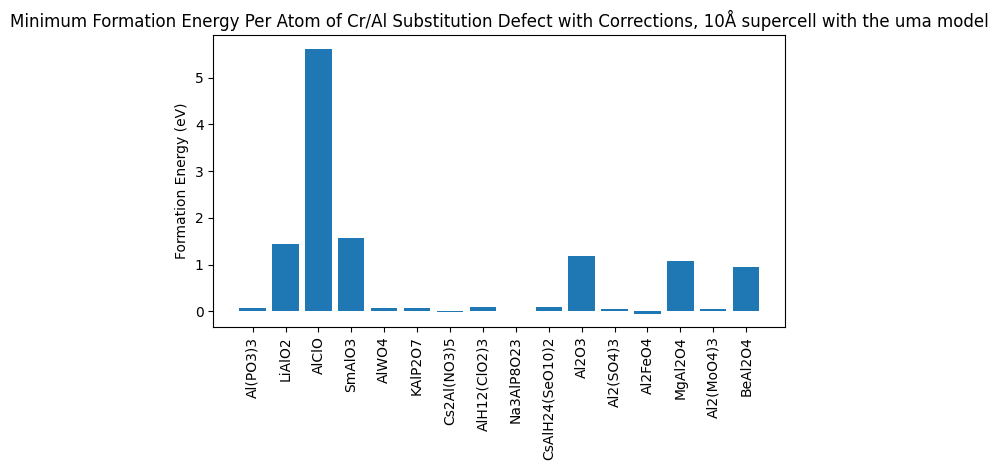

In [16]:
fig, ax = plt.subplots()
bars = ax.bar(compounds, mfe)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy Per Atom of Cr/Al Substitution Defect with Corrections, {supercell_size}Å supercell with the {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../../figures/{MODEL}_corrections_min_defect_formation_energies_per_atom_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()